<a href="https://colab.research.google.com/github/jaaaamj0711/kaggle_study/blob/master/The%20Bread%20Basket%20Analysis/The_Bread_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🍞  빵가게 장바구니 연관 분석

In [2]:
data = pd.read_csv("/content/drive/MyDrive/bread basket.csv")

In [102]:
import datetime
import calendar
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('bmh')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [7]:
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


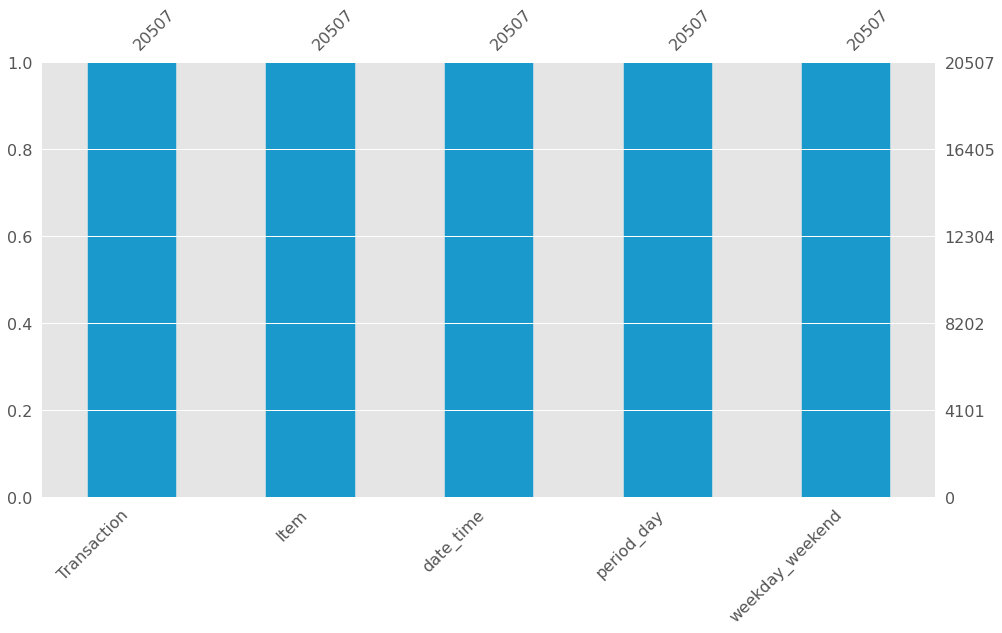

In [18]:
msno.bar(df=data.iloc[:, :], figsize=(16,8),color=(0.1, 0.6, 0.8))

결측값은 존재하지 않습니다.

In [20]:
print('빵가게에서는 총 {}개의 다른 품목들을 판매하고 있습니다.'.format(len(data['Item'].unique())))

빵가게에서는 총 94개의 다른 품목들을 판매하고 있습니다.


In [23]:
print('총 고유값은 {}개로 구성되어 있습니다.'.format(data['Transaction'].nunique()))

총 고유값은 9465개로 구성되어 있습니다.


## **데이터 전처리**

날짜와 시간 데이터를 보면 범위가 크게 잡혀있는것으로 보입니다. 전처리를 통해 좀 더 세부적으로 쪼개도록 하겠습니다.

In [39]:
data.date_time

0        30-10-2016 09:58
1        30-10-2016 10:05
2        30-10-2016 10:05
3        30-10-2016 10:07
4        30-10-2016 10:07
               ...       
20502    09-04-2017 14:32
20503    09-04-2017 14:32
20504    09-04-2017 14:57
20505    09-04-2017 14:57
20506    09-04-2017 15:04
Name: date_time, Length: 20507, dtype: object

In [48]:
day = []
for dt in data.date_time:
    day_num = datetime.datetime.strptime(dt.split(' ')[0], '%d-%m-%Y').weekday() # 시간을 문자 형태로 출력후 요일은 숫자로 반환
    day.append(calendar.day_name[day_num]) #요일로 변환

In [51]:
day[0:10]

['Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday',
 'Sunday']

In [54]:
# 날짜 시간 상세하게 분리하기
data['date'] = pd.to_datetime(data['date_time']).dt.date
data['time'] = pd.to_datetime(data['date_time']).dt.time
data['day'] = day
data['month'] = pd.to_datetime(data['date_time']).dt.month
data['hour'] = pd.to_datetime(data['date_time']).dt.hour

In [56]:
# 숫자로된 월데이터를 텍스트로 변환
data['month'] = data['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),  ('January','February','March','April','May','June','July','August',
                                          'September','October','November','December'))

In [57]:
data.drop(['date_time'], axis=1, inplace=True)
data.rename(columns={'weekday_weekend': 'day_type'}, inplace=True)
data.head()

,Transaction,Item,period_day,day_type,date,time,day,month,hour
0,1,Bread,morning,weekend,2016-10-30,09:58:00,Sunday,October,9
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,Sunday,October,10
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,Sunday,October,10
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,Sunday,October,10
4,3,Jam,morning,weekend,2016-10-30,10:07:00,Sunday,October,10


## **EDA**

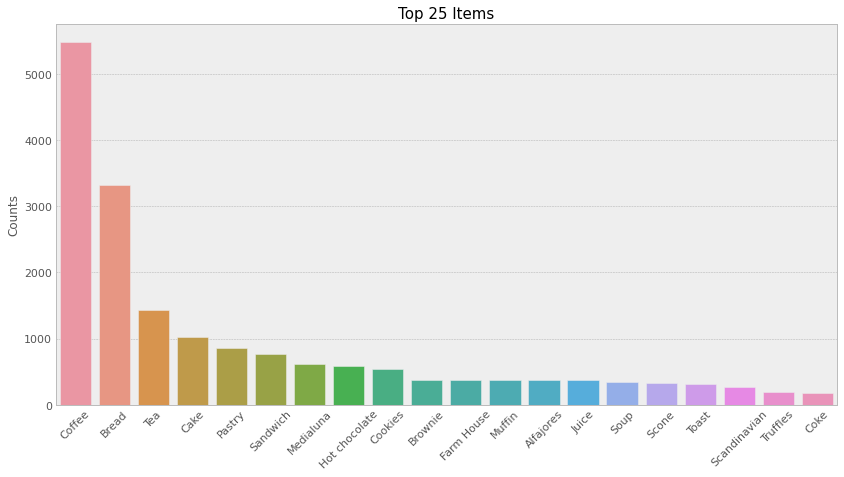

In [64]:
plt.figure(figsize=(14, 7))
sns.barplot(x=data.Item.value_counts().head(20).index, y=data.Item.value_counts().head(20))
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.title('Top 25 Items', fontsize=15,color='black')
plt.show()

주로 커피가 가장 많이 팔립니다. 다음으로는 빵, 티, 케이크 등이 있었습니다.

In [69]:
month_count = data.groupby('month')['Transaction'].count().reset_index()
day_count = data.groupby('day')['Transaction'].count().reset_index()
hour_count = data.groupby('hour')['Transaction'].count().reset_index()

In [71]:
month_count['order'] = [4, 8, 12, 2, 1, 7, 6, 3, 5, 11, 10, 9]
month_count.sort_values('order', inplace=True)

In [74]:
day_count['order'] = [5, 1, 6, 7, 4, 2, 3]
day_count.sort_values('order', inplace=True)

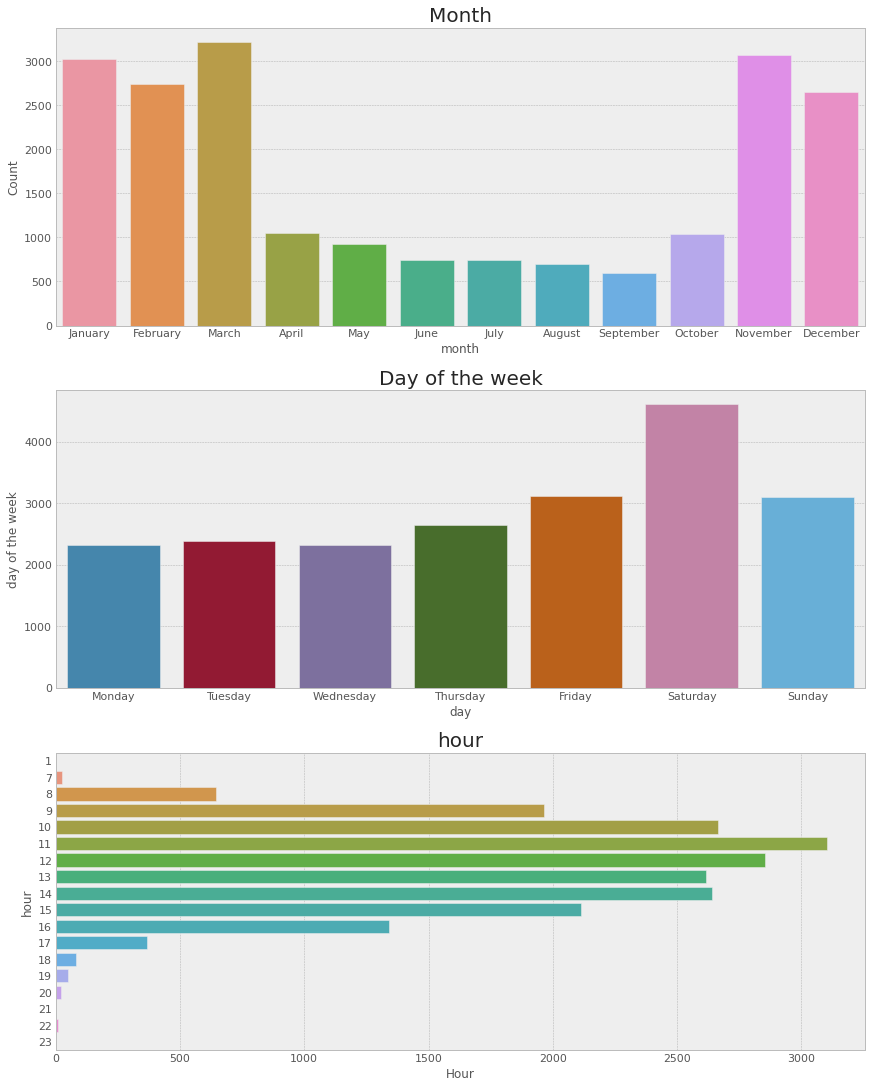

In [87]:
fig = plt.figure(figsize=(12, 15), constrained_layout=True) # subplot 간격 조절
gs = gridspec.GridSpec(nrows=3, ncols=1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])

sns.barplot(x='month', y='Transaction', data=month_count, ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Month', fontsize=20)

sns.barplot(x='day', y='Transaction', data=day_count, ax=ax2)
ax2.set_ylabel('day of the week')
ax2.set_title('Day of the week', fontsize=20)

sns.barplot(x='Transaction', y='hour', data=hour_count,orient='h', ax=ax3)
ax3.set_xlabel('Hour')
ax3.set_title('hour', fontsize=20)
plt.show()

- 월에서는 1월, 3월, 11월에서 높은 구매율을 보였습니다.  

- 요일에서는 주로 토요일에 구매율이 높았습니다.

- 시간대에서는 주로 오전, 점심시간에 구매율이 높았습니다.

시간대별로 구매한 폼목의 차이가 있는지 알아보도록 하겠습니다.

In [92]:
data_period = data.groupby(['period_day','Item'])['Transaction'].count().reset_index()
data_period = data_period.sort_values(['period_day','Transaction'],ascending=False)

In [94]:
period = ['morning','afternoon','evening','night']

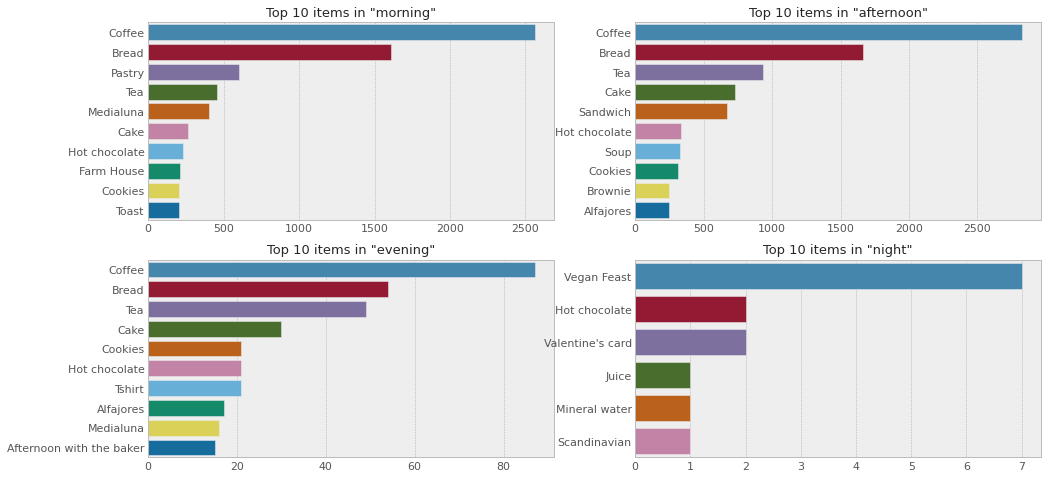

In [100]:
plt.figure(figsize=(16,8))
for i,j in enumerate(period):
    plt.subplot(2,2,i+1)
    df1 = data_period[data_period.period_day==j].head(10)
    sns.barplot(data=df1, y=df1.Item, x=df1.Transaction)
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Top 10 items in "{}"'.format(j), size=13)

plt.show()

아침, 오후, 저녁에는 주로 커피와 빵을 가장 많이 구매한다는 결과가 나왔습니다.  

하지만 밤에는 다른 결과가 나왔습니다. 밤에는 커피와 빵보다는 비건 제품을 많이 구매했고, 핫초코도 구매율이 높았습니다.

## **장바구니 연관 분석**

In [104]:
from mlxtend.frequent_patterns import association_rules, apriori

In [111]:
Transaction = data.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name ='Count')
Transaction

,Transaction,Item,Count
0,1,Bread,1
1,2,Scandinavian,2
2,3,Cookies,1
3,3,Hot chocolate,1
4,3,Jam,1
...,...,...,...
18882,9682,Tacos/Fajita,1
18883,9682,Tea,1
18884,9683,Coffee,1
18885,9683,Pastry,1


In [112]:
basket = Transaction.pivot_table(index='Transaction', columns='Item', values='Count', aggfunc='sum').fillna(0)
basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,Fudge,Gift voucher,Gingerbread syrup,Granola,Hack the stack,Half slice Monster,Hearty & Seasonal,Honey,Hot chocolate,Jam,Jammie Dodgers,Juice,Keeping It Local,Kids biscuit,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


장바구니 분석을 하려면 다음과 같이 하나의 행렬을 만들어야 합니다. 이 행렬은 각 트랜잭션에 항목이 있는지 여부를 나타내는 행렬입니다.

In [113]:
# 0, 1 로 변환해주는 함수
def encoding(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

# applying the function to the dataset

basket = basket.applymap(encoding)
basket.head()

Item,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,Bread Pudding,Brioche and salami,Brownie,Cake,Caramel bites,Cherry me Dried fruit,Chicken Stew,Chicken sand,Chimichurri Oil,Chocolates,Christmas common,Coffee,Coffee granules,Coke,Cookies,Crepes,Crisps,Drinking chocolate spoons,Duck egg,Dulce de Leche,Eggs,Ella's Kitchen Pouches,Empanadas,Extra Salami or Feta,Fairy Doors,Farm House,Focaccia,Frittata,Fudge,Gift voucher,Gingerbread syrup,Granola,Hack the stack,Half slice Monster,Hearty & Seasonal,Honey,Hot chocolate,Jam,Jammie Dodgers,Juice,Keeping It Local,Kids biscuit,Lemon and coconut,Medialuna,Mighty Protein,Mineral water,Mortimer,Muesli,Muffin,My-5 Fruit Shoot,Nomad bag,Olum & polenta,Panatone,Pastry,Pick and Mix Bowls,Pintxos,Polenta,Postcard,Raspberry shortbread sandwich,Raw bars,Salad,Sandwich,Scandinavian,Scone,Siblings,Smoothies,Soup,Spanish Brunch,Spread,Tacos/Fajita,Tartine,Tea,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [114]:
freq_item = apriori(basket, min_support = 0.01,use_colnames = True)
freq_item

,support,itemsets
0,0.036344,(Alfajores)
1,0.016059,(Baguette)
2,0.327205,(Bread)
3,0.040042,(Brownie)
4,0.103856,(Cake)
...,...,...
56,0.023666,"(Coffee, Toast)"
57,0.014369,"(Tea, Sandwich)"
58,0.010037,"(Coffee, Cake, Bread)"
59,0.011199,"(Coffee, Pastry, Bread)"


apriori는 연관분석에 사용되는 함수입니다. 여기서 최소 지지도 값을 0.01로 설정을 하였습니다.  

0.01의 의미는 총 9465건의 거래 중에서 최소한 94건의 거래 해당 항목을 고려했을 때만 해당 항목이 존재해야 한다는 것을 의미합니다.

이제 규칙을 만들도록 하겠습니다.

In [115]:
rules = association_rules(freq_item, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
31,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
29,(Spanish Brunch),(Coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
18,(Medialuna),(Coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
22,(Pastry),(Coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
1,(Alfajores),(Coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
17,(Juice),(Coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
25,(Sandwich),(Coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
6,(Cake),(Coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
26,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
13,(Cookies),(Coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174


결과해석은 다음ㅇ ㅏ겟스비낟.`ㅜ`